In [1]:
# Libraries

import math
import seaborn as sns
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error


# Data import and preview

In [2]:
dataset_train = pd.read_csv('C:/Users/olekw/Desktop/Studia/MAG 1 - WNE/12.ML/__Project/_data/newborn_train.csv')
dataset_test = pd.read_csv('C:/Users/olekw/Desktop/Studia/MAG 1 - WNE/12.ML/__Project/_data/newborn_test.csv')
pd.options.display.float_format = '{:20.2f}'.format

In [3]:
dataset_train.head(n=5)

,mother_body_mass_index,mother_marital_status,mother_delivery_weight,mother_race,mother_height,mother_weight_gain,father_age,father_education,cigarettes_before_pregnancy,prenatal_care_month,number_prenatal_visits,previous_cesarean,newborn_gender,newborn_weight
0,30.80,2.00,220.00,1,65.00,35.00,29.00,6,0.00,2,10.00,N,F,3045
1,45.80,NaN,293.00,1,64.00,26.00,37.00,4,0.00,3,10.00,N,F,3061
2,NaN,1.00,NaN,1,66.00,NaN,33.00,6,0.00,3,NaN,N,F,3827
3,24.30,1.00,157.00,1,NaN,20.00,27.00,6,0.00,3,9.00,N,M,3997
4,24.10,1.00,187.00,1,65.00,42.00,29.00,8,0.00,2,12.00,N,F,3240


In [4]:
dataset_train.describe(include=[np.number], percentiles=[.2]) \
    .transpose().drop('count', axis=1)

In [ ]:
dataset_train.describe(include=[object]).transpose() \
    .drop('count', axis=1)

,unique,top,freq
previous_cesarean,3,N,2020874
newborn_gender,2,M,1225891


# Data cleaning

## Missing values removal

In [ ]:
if (dataset_train.isna().values.sum() == 0):
    print("There are no missing values in the training dataset.")
else:
    print("There are missing values in the training dataset.")

There are missing values in the training dataset.


In [ ]:
if (dataset_test.isna().values.sum() == 0):
    print("There are no missing values in the testing dataset.")
else:
    print("There are missing values in the testing dataset.")

There are missing values in the testing dataset.


In [ ]:
num_missing = dataset_train.isna().sum()
# Excluding columns that contains 0 missing values
num_missing = num_missing[num_missing > 0]
# Getting the percentages of missing values
percent_missing = num_missing * 100 / dataset_train.shape[0]
# Concatenating the number and perecentage of missing values 
# into one dataframe and sorting it
pd.concat([num_missing, percent_missing], axis=1, 
          keys=['Missing Values', 'Percentage']).\
          sort_values(by='Missing Values', ascending=False)

,Missing Values,Percentage
father_age,444506,18.54
mother_marital_status,412510,17.20
mother_height,244529,10.20
mother_body_mass_index,146600,6.11
mother_weight_gain,73473,3.06
number_prenatal_visits,59901,2.50
mother_delivery_weight,34958,1.46
cigarettes_before_pregnancy,11301,0.47


There are three variables with over 10% of missing values. Those could pose a threat of damaging the model's accuracy if dealt with improperly. The remaining variables have low % of missing values, but we have to deal with them nontheless.

In [ ]:
num_missing_t = dataset_test.isna().sum()
# Excluding columns that contains 0 missing values
num_missing_t = num_missing_t[num_missing_t > 0]
# Getting the percentages of missing values
percent_missing_t = num_missing_t * 100 / dataset_test.shape[0]
# Concatenating the number and perecentage of missing values 
# into one dataframe and sorting it
pd.concat([num_missing_t, percent_missing_t], axis=1, 
          keys=['Missing Values', 'Percentage']).\
          sort_values(by='Missing Values', ascending=False)

,Missing Values,Percentage
father_age,110518,18.43
mother_marital_status,103384,17.24
mother_height,61559,10.27
mother_body_mass_index,36791,6.14
mother_weight_gain,18334,3.06
number_prenatal_visits,14985,2.50
mother_delivery_weight,8644,1.44
cigarettes_before_pregnancy,2907,0.48


## Missing's - Variables

### Father age

In this case, we will replace the missing values with the average fathers age.

In [ ]:
dataset_train['father_age'].value_counts()

father_age
32.00    120181
31.00    118844
33.00    116729
30.00    116504
29.00    109740
          ...  
91.00         1
11.00         1
85.00         1
98.00         1
82.00         1
Name: count, Length: 78, dtype: int64

In [ ]:
dataset_train['father_age'].fillna(round(dataset_train['father_age'].mean()), inplace=True)
dataset_test['father_age'].fillna(round(dataset_test['father_age'].mean()), inplace=True)

### Mother marital status

1 - Married ||
2 - Not married --> 0 - Other

In this case, missing values will be replaced with 0, as we will assume that the missing values could be describing other marital statuses, not directly described as 'married'.

In [ ]:
dataset_train['mother_marital_status'].value_counts()

mother_marital_status
1.00    1192238
2.00     793368
Name: count, dtype: int64

In [ ]:
dataset_test['mother_marital_status'].fillna(0, inplace=True)
dataset_train['mother_marital_status'].fillna(0, inplace=True)

### Mother height

In this case, we will replace the missing values with the average of the height.

In [ ]:
dataset_train['mother_height'].value_counts()

mother_height
64.00    319699
63.00    281534
62.00    273071
65.00    257357
66.00    237395
67.00    187786
61.00    155167
60.00    119183
68.00    103323
69.00     69668
59.00     49961
70.00     34409
71.00     18487
58.00     12701
57.00     11234
72.00      8406
56.00      4039
73.00      2774
55.00      1756
74.00      1401
54.00       797
53.00       752
75.00       513
78.00       438
48.00       283
76.00       269
77.00       266
49.00       256
52.00       242
51.00       201
50.00       153
30.00        10
47.00         9
45.00         8
36.00         7
39.00         7
46.00         6
37.00         3
41.00         3
38.00         3
40.00         2
31.00         2
42.00         2
43.00         2
32.00         1
33.00         1
Name: count, dtype: int64

In [ ]:
dataset_train['mother_height'] = np.where(
    dataset_train['mother_height'].isnull() & np.isfinite(dataset_train['mother_body_mass_index']) & np.isfinite(dataset_train['mother_weight_gain']) & np.isfinite(dataset_train['mother_delivery_weight']), 
    round((((dataset_train['mother_delivery_weight']-dataset_train['mother_weight_gain'])*703)/dataset_train['mother_body_mass_index'])**(0.5)), 
    dataset_train['mother_height'])

dataset_test['mother_height'] = np.where(
    dataset_test['mother_height'].isnull() & np.isfinite(dataset_test['mother_body_mass_index']) & np.isfinite(dataset_test['mother_weight_gain']) & np.isfinite(dataset_test['mother_delivery_weight']), 
    round((((dataset_test['mother_delivery_weight']-dataset_test['mother_weight_gain'])*703)/dataset_test['mother_body_mass_index'])**(0.5)), 
    dataset_test['mother_height'])

In [ ]:
dataset_train['mother_height'].value_counts()

mother_height
64.00    351777
63.00    310109
62.00    300557
65.00    283399
66.00    261282
67.00    206678
61.00    170933
60.00    131166
68.00    113770
69.00     76557
59.00     54958
70.00     37896
71.00     20291
58.00     14061
57.00     12376
72.00      9239
56.00      4450
73.00      3048
55.00      1941
74.00      1547
54.00       874
53.00       852
75.00       560
78.00       454
48.00       310
76.00       301
77.00       290
49.00       275
52.00       261
51.00       222
50.00       169
79.00        15
47.00        11
30.00        10
45.00         9
39.00         7
36.00         7
46.00         6
41.00         4
81.00         4
38.00         3
37.00         3
80.00         3
31.00         2
42.00         2
40.00         2
43.00         2
82.00         1
32.00         1
44.00         1
83.00         1
33.00         1
Name: count, dtype: int64

In [ ]:
dataset_test['mother_height'].fillna(round(dataset_test['mother_height'].mean()), inplace=True)
dataset_train['mother_height'].fillna(round(dataset_train['mother_height'].mean()), inplace=True)

### Mother body mass index

In this case, we will replace the missing values with the average of the BMI.

In [ ]:
dataset_train['mother_body_mass_index'].value_counts()

mother_body_mass_index
26.60    41362
28.30    36430
23.00    29869
22.30    28077
25.80    27046
         ...  
67.20        1
69.40        1
66.30        1
68.90        1
68.60        1
Name: count, Length: 561, dtype: int64

In [ ]:
dataset_train['mother_body_mass_index'] = np.where(
    dataset_train['mother_body_mass_index'].isnull() & np.isfinite(dataset_train['mother_weight_gain']) & np.isfinite(dataset_train['mother_delivery_weight']), 
    round((703*(dataset_train['mother_delivery_weight']-dataset_train['mother_weight_gain']))/(dataset_train['mother_height']**2),2), 
    dataset_train['mother_height'])

dataset_test['mother_body_mass_index'] = np.where(
    dataset_test['mother_body_mass_index'].isnull() & np.isfinite(dataset_test['mother_weight_gain']) & np.isfinite(dataset_test['mother_delivery_weight']), 
    round((703*(dataset_test['mother_delivery_weight']-dataset_test['mother_weight_gain']))/(dataset_test['mother_height']**2),2), 
    dataset_test['mother_height'])

In [ ]:
dataset_train['mother_body_mass_index'].fillna(round(dataset_train['mother_body_mass_index'].mean(),2), inplace=True)
dataset_test['mother_body_mass_index'].fillna(round(dataset_test['mother_body_mass_index'].mean(),2), inplace=True)

### Mother weight gain

In this case, we will replace the missing values with the mothers average weight gain.

In [ ]:
dataset_train['mother_weight_gain'].value_counts()

mother_weight_gain
30.00    110254
20.00     84648
25.00     80517
35.00     73636
 0.00     68723
          ...  
91.00       251
94.00       232
93.00       228
96.00       215
97.00       181
Name: count, Length: 99, dtype: int64

In [ ]:
dataset_train['mother_weight_gain'].fillna(round(dataset_train['mother_weight_gain'].mean(),2), inplace=True)
dataset_test['mother_weight_gain'].fillna(round(dataset_test['mother_weight_gain'].mean(),2), inplace=True)

### Number prenatal visits

In this case, as the number of prenatal visits is the highets around 10-14, with outliers around 60-70, we will replace the missing values with the average of the visits.

In [ ]:
dataset_train['number_prenatal_visits'].value_counts()

number_prenatal_visits
12.00    370513
10.00    313608
11.00    238126
13.00    229898
14.00    193076
          ...  
62.00         1
71.00         1
68.00         1
66.00         1
63.00         1
Name: count, Length: 81, dtype: int64

In [ ]:
dataset_train['number_prenatal_visits'].fillna(round(dataset_train['number_prenatal_visits'].mean()), inplace=True)
dataset_test['number_prenatal_visits'].fillna(round(dataset_test['number_prenatal_visits'].mean()), inplace=True)

### Mother delivery weight

In this case, we will replace the missing values with the mothers average weight.

In [ ]:
dataset_train['mother_delivery_weight'].value_counts()

mother_delivery_weight
160.00    47979
180.00    47202
170.00    44111
150.00    40506
165.00    37313
          ...  
399.00       47
393.00       47
387.00       45
397.00       41
394.00       38
Name: count, Length: 301, dtype: int64

In [ ]:
dataset_train['mother_delivery_weight'].fillna(round(dataset_train['mother_delivery_weight'].mean()), inplace=True)
dataset_test['mother_delivery_weight'].fillna(round(dataset_test['mother_delivery_weight'].mean()), inplace=True)

### Cigarettes before pregnancy

In this case, since the percentage of missing values is low (0.47%), we will optimistically replace the missing values with 0.

In [ ]:
dataset_train['cigarettes_before_pregnancy'].value_counts()

cigarettes_before_pregnancy
 0.00    2186624
20.00      60078
10.00      53333
 5.00      21147
 3.00       9887
          ...   
92.00          1
69.00          1
29.00          1
73.00          1
72.00          1
Name: count, Length: 67, dtype: int64

In [ ]:
dataset_train['cigarettes_before_pregnancy'].fillna(0, inplace=True)
dataset_test['cigarettes_before_pregnancy'].fillna(0, inplace=True)

### Prenatal care month - 99 issue

With this variable, describing in which month the prenatal care was first provided, the issue we are facing is 99 encoding no prenatal care provided. Since the data is very detailed when it comes to all the different variables, we are by default assuming that the birth took place at the hospital, or a different professional health care facility, which could take those measurements, hence, a minimal amount of prenatal care had to be provided at least at the very last seconds before birth. With this assumption, we will go forward with replacing 99 values with 9, which shouldn't disturb the data too much, since neither 99 or 9 is not among the most populated groups.

In [ ]:
dataset_train['prenatal_care_month'].value_counts()

prenatal_care_month
2     941813
3     730167
4     210075
1     139262
5     105509
6      65178
99     59760
7      51778
0      40409
8      38619
9      15276
10       270
Name: count, dtype: int64

In [ ]:
dataset_train['prenatal_care_month'] = dataset_train['prenatal_care_month'].replace(99,9)
dataset_test['prenatal_care_month'] = dataset_test['prenatal_care_month'].replace(99,9)

In [ ]:
dataset_train['prenatal_care_month'].value_counts()

prenatal_care_month
2     941813
3     730167
4     210075
1     139262
5     105509
9      75036
6      65178
7      51778
0      40409
8      38619
10       270
Name: count, dtype: int64

### Verification

In [ ]:
if (dataset_train.isna().values.sum() == 0):
    print("There are no missing values in the training dataset.")
else:
    print("There are still missing values in the training dataset.")

There are no missing values in the training dataset.


In [ ]:
if (dataset_test.isna().values.sum() == 0):
    print("There are no missing values in the training dataset.")
else:
    print("There are still missing values in the training dataset.")

There are no missing values in the training dataset.


## One-hot encoding

In this step, we will use one-hot encoding to transform certain nominal variables.

In [ ]:
#Create dummies/one-hot encoding on every nominal attributes in train dataframe
mother_marital_status_dummies = pd.get_dummies(dataset_train['mother_marital_status'],prefix='mother_marital_status')
mother_race_dummies = pd.get_dummies(dataset_train['mother_race'],prefix='mother_race')
father_education_dummies = pd.get_dummies(dataset_train['father_education'],prefix='father_education')
previous_cesarean_dummies = pd.get_dummies(dataset_train['previous_cesarean'],prefix='previous_cesarean')
newborn_gender_dummies = pd.get_dummies(dataset_train['newborn_gender'],prefix='newborn_gender')

#Concate the dummies into train dataset
d_train = pd.concat([dataset_train, mother_marital_status_dummies, mother_race_dummies, father_education_dummies, previous_cesarean_dummies, newborn_gender_dummies], axis=1)

#Drop categorical attribute (before transformation)
d_train = d_train.drop(['mother_marital_status','mother_race', 'father_education', 'previous_cesarean', 'newborn_gender'], axis=1)

d_train = d_train.replace(False,0)
d_train = d_train.replace(True,1)
d_train

,mother_body_mass_index,mother_delivery_weight,mother_height,mother_weight_gain,father_age,cigarettes_before_pregnancy,prenatal_care_month,number_prenatal_visits,newborn_weight,mother_marital_status_0.0,...,father_education_5,father_education_6,father_education_7,father_education_8,father_education_9,previous_cesarean_N,previous_cesarean_U,previous_cesarean_Y,newborn_gender_F,newborn_gender_M
0,65.00,220.00,65.00,35.00,29.00,0.00,2,10.00,3045,0,...,0,1,0,0,0,1,0,0,1,0
1,64.00,293.00,64.00,26.00,37.00,0.00,3,10.00,3061,1,...,0,0,0,0,0,1,0,0,1,0
2,66.00,188.00,66.00,29.48,33.00,0.00,3,11.00,3827,0,...,0,1,0,0,0,1,0,0,1,0
3,63.00,157.00,63.00,20.00,27.00,0.00,3,9.00,3997,0,...,0,1,0,0,0,1,0,0,0,1
4,65.00,187.00,65.00,42.00,29.00,0.00,2,12.00,3240,0,...,0,0,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2398111,63.00,152.00,63.00,27.00,32.00,0.00,4,5.00,3015,0,...,0,0,0,0,0,1,0,0,0,1
2398112,71.00,260.00,71.00,16.00,33.00,0.00,1,13.00,3572,0,...,0,0,0,0,0,1,0,0,0,1
2398113,63.00,157.00,63.00,18.00,26.00,0.00,3,15.00,3299,0,...,0,0,0,0,0,1,0,0,1,0
2398114,61.00,185.00,61.00,47.00,31.00,0.00,2,15.00,3062,1,...,0,0,0,0,0,1,0,0,0,1


In [ ]:
#Create dummies/one-hot encoding on every nominal attributes in test dataframe
mother_marital_status_dummies = pd.get_dummies(dataset_test['mother_marital_status'],prefix='mother_marital_status')
mother_race_dummies = pd.get_dummies(dataset_test['mother_race'],prefix='mother_race')
father_education_dummies = pd.get_dummies(dataset_test['father_education'],prefix='father_education')
previous_cesarean_dummies = pd.get_dummies(dataset_test['previous_cesarean'],prefix='previous_cesarean')
newborn_gender_dummies = pd.get_dummies(dataset_test['newborn_gender'],prefix='newborn_gender')

#Concate the dummies into test dataset
d_test = pd.concat([dataset_test, mother_marital_status_dummies, mother_race_dummies, father_education_dummies, previous_cesarean_dummies, newborn_gender_dummies], axis=1)

#Drop categorical attribute (before transformation)
d_test = d_test.drop(['mother_marital_status','mother_race', 'father_education', 'previous_cesarean', 'newborn_gender'], axis=1)

d_test = d_test.replace(False,0)
d_test = d_test.replace(True,1)
d_test

,mother_body_mass_index,mother_delivery_weight,mother_height,mother_weight_gain,father_age,cigarettes_before_pregnancy,prenatal_care_month,number_prenatal_visits,mother_marital_status_0.0,mother_marital_status_1.0,...,father_education_5,father_education_6,father_education_7,father_education_8,father_education_9,previous_cesarean_N,previous_cesarean_U,previous_cesarean_Y,newborn_gender_F,newborn_gender_M
0,63.00,149.00,63.00,23.00,30.00,0.00,2,15.00,0,1,...,0,1,0,0,0,1,0,0,1,0
1,67.00,198.00,67.00,23.00,28.00,0.00,4,16.00,0,1,...,0,0,0,0,0,1,0,0,1,0
2,64.00,164.00,64.00,20.00,22.00,0.00,2,11.00,0,0,...,0,0,0,0,0,1,0,0,1,0
3,66.00,235.00,66.00,20.00,24.00,0.00,2,13.00,0,0,...,0,0,0,0,0,1,0,0,0,1
4,64.00,213.00,64.00,5.00,32.00,0.00,3,9.00,1,0,...,0,0,0,0,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599556,64.00,139.00,64.00,30.00,30.00,0.00,4,10.00,0,1,...,0,0,0,0,0,1,0,0,1,0
599557,24.89,193.00,64.00,48.00,22.00,10.00,3,12.00,1,0,...,0,0,0,0,0,1,0,0,1,0
599558,64.00,259.00,64.00,19.00,23.00,0.00,3,11.00,0,0,...,0,0,0,0,0,0,0,1,1,0
599559,67.00,207.00,67.00,1.00,27.00,0.00,4,13.00,1,0,...,0,0,0,0,0,1,0,0,1,0


# PLACEHOLDER - SCATTER

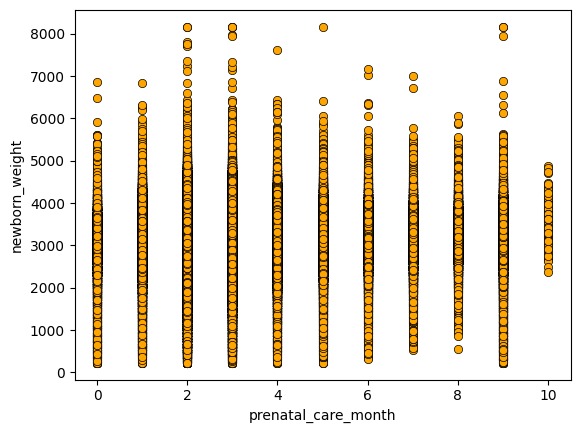

In [ ]:
plt.scatter(x=d_train['prenatal_care_month'], y=d_train['newborn_weight'], 
            color="orange", edgecolors="#000000", linewidths=0.5);
plt.xlabel('prenatal_care_month'); plt.ylabel('newborn_weight');

# Exploratory Data Analysis

## Newborn weight

<Axes: xlabel='newborn_weight'>

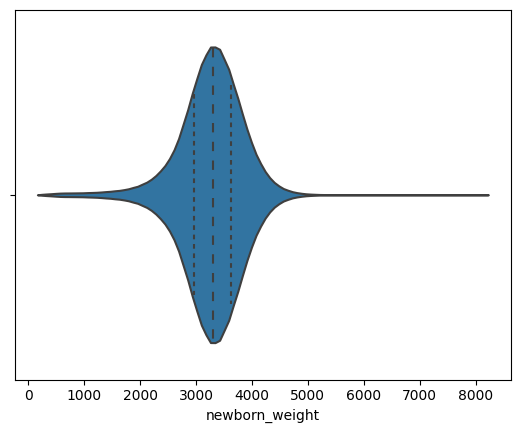

In [ ]:
sns.violinplot(x=d_train['newborn_weight'], inner="quartile")

<Axes: >

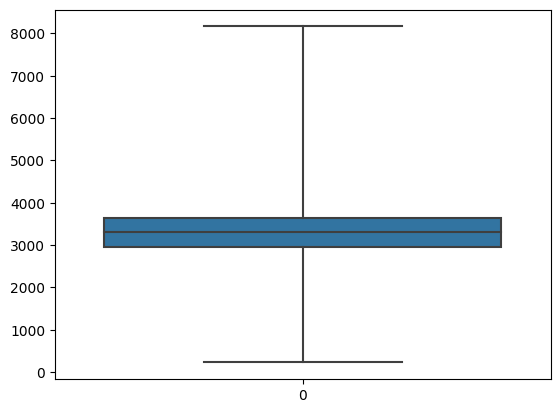

In [ ]:
sns.boxplot(d_train['newborn_weight'], whis=10)

Text(0, 0.5, 'Count')

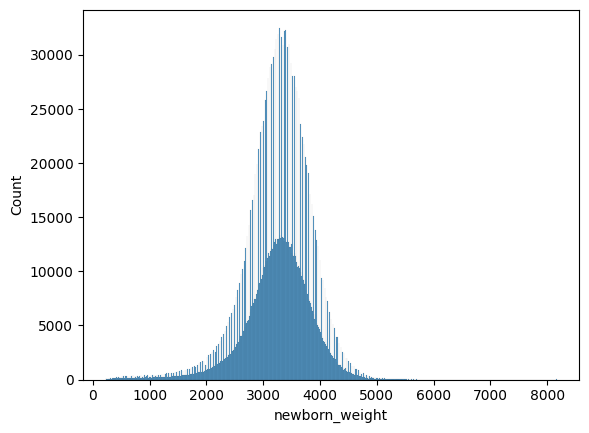

In [ ]:
sns.histplot(d_train['newborn_weight'])
plt.ylabel("Count")

## Variables

In [ ]:
d_train.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2398116 entries, 0 to 2398115
Data columns (total 32 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   mother_body_mass_index       float64
 1   mother_delivery_weight       float64
 2   mother_height                float64
 3   mother_weight_gain           float64
 4   father_age                   float64
 5   cigarettes_before_pregnancy  float64
 6   prenatal_care_month          int64  
 7   number_prenatal_visits       float64
 8   newborn_weight               int64  
 9   mother_marital_status_0.0    int64  
 10  mother_marital_status_1.0    int64  
 11  mother_marital_status_2.0    int64  
 12  mother_race_1                int64  
 13  mother_race_2                int64  
 14  mother_race_3                int64  
 15  mother_race_4                int64  
 16  mother_race_5                int64  
 17  mother_race_6                int64  
 18  father_education_1           int64  
 19  

In [ ]:
d_train.describe().transpose().drop('count', axis=1)

,mean,std,min,25%,50%,75%,max
mother_body_mass_index,62.62,7.93,9.45,62.00,64.00,66.00,248.72
mother_delivery_weight,188.31,41.07,100.00,160.00,182.00,210.00,400.00
mother_height,64.12,2.82,30.00,62.00,64.00,66.00,83.00
mother_weight_gain,29.48,14.91,0.00,20.00,29.48,38.00,98.00
father_age,31.84,6.15,11.00,28.00,32.00,35.00,98.00
cigarettes_before_pregnancy,1.10,4.72,0.00,0.00,0.00,0.00,98.00
prenatal_care_month,3.05,1.78,0.00,2.00,3.00,3.00,10.00
number_prenatal_visits,11.29,4.14,0.00,9.00,11.00,13.00,98.00
newborn_weight,3261.84,590.47,227.00,2960.00,3300.00,3629.00,8165.00
mother_marital_status_0.0,0.17,0.38,0.00,0.00,0.00,0.00,1.00


There are several concerning observations resulting from the above analysis, which we should inspect closely. 

First alarming observations concern the BMI of the mother. While inspecting sources like NSH inform (https://www.nhsinform.scot/healthy-living/food-and-nutrition/healthy-eating-and-weight-loss/body-mass-index-bmi#:~:text=BMI%20ranges&text=between%2018.5%20and%2024.9%20%E2%80%93%20This,is%20described%20as%20severe%20obesity), it could be concluded that the BMI of 70, which is the maximum in our database is way unrealistic. Hovewer, when comparing it to the potential height and weight of the mother, assuming the maximum weight and the 75% Quantile height, we arrive at a conclusion that this could indeed be a possible record, as the BMI in such case is around 69. Nevertheless, considering the amount of data we have, we are inspecting this as a possible outlier issue.

In [ ]:
print("BMI: ", round(200/(1.70)**2,2))

BMI:  69.2


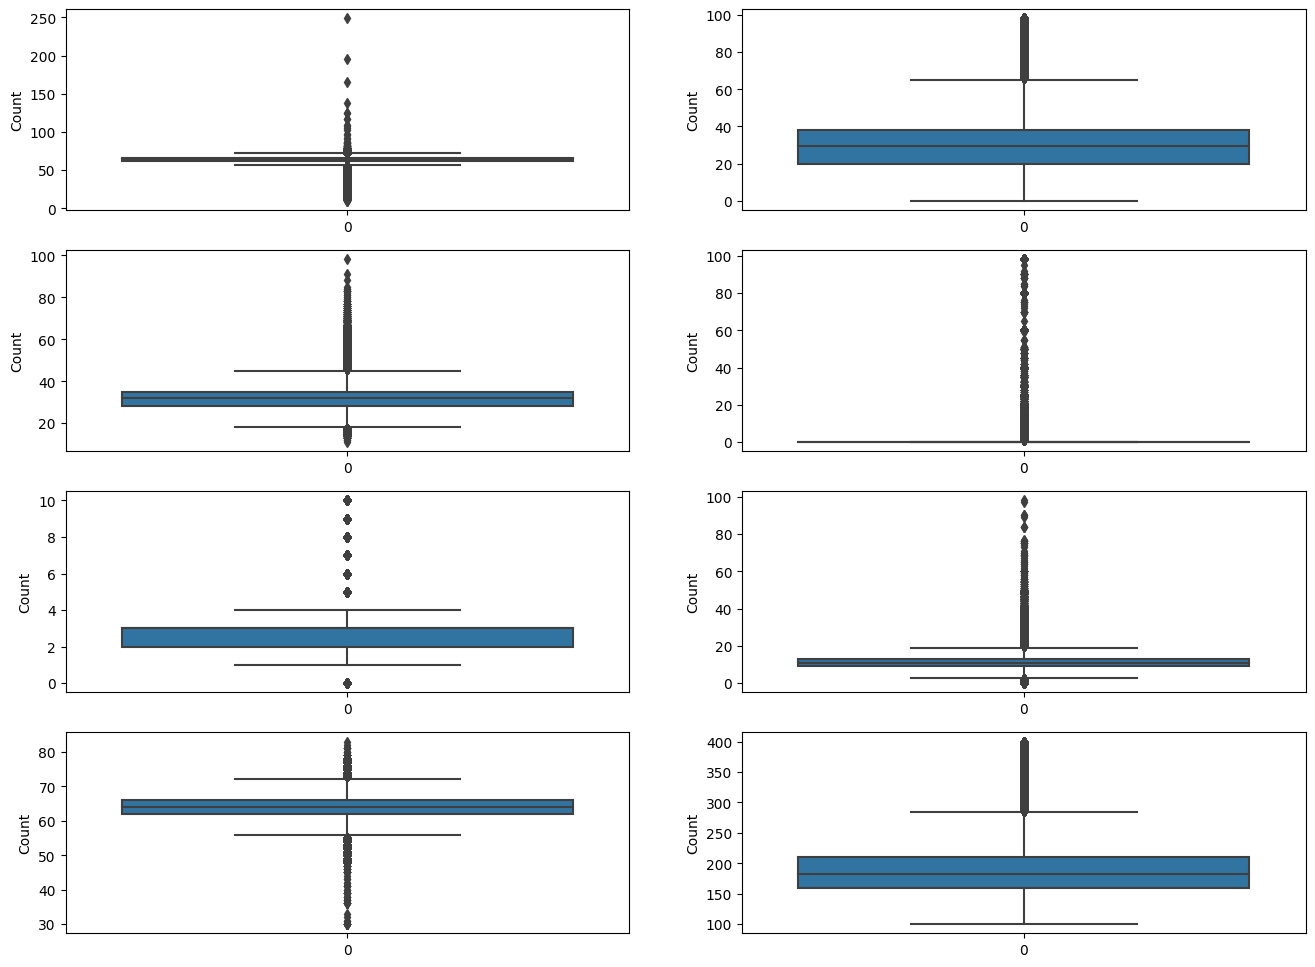

In [ ]:
fig, axes = plt.subplots(4, 2, figsize=(16, 12))
for ax, v in zip(axes.flat, ['mother_body_mass_index', 'mother_weight_gain', 
                             'father_age', 'cigarettes_before_pregnancy', 'prenatal_care_month', 'number_prenatal_visits', 'mother_height', 'mother_delivery_weight']):
    sns.boxplot(d_train[v], ax=ax)
    ax.set(ylabel="Count");

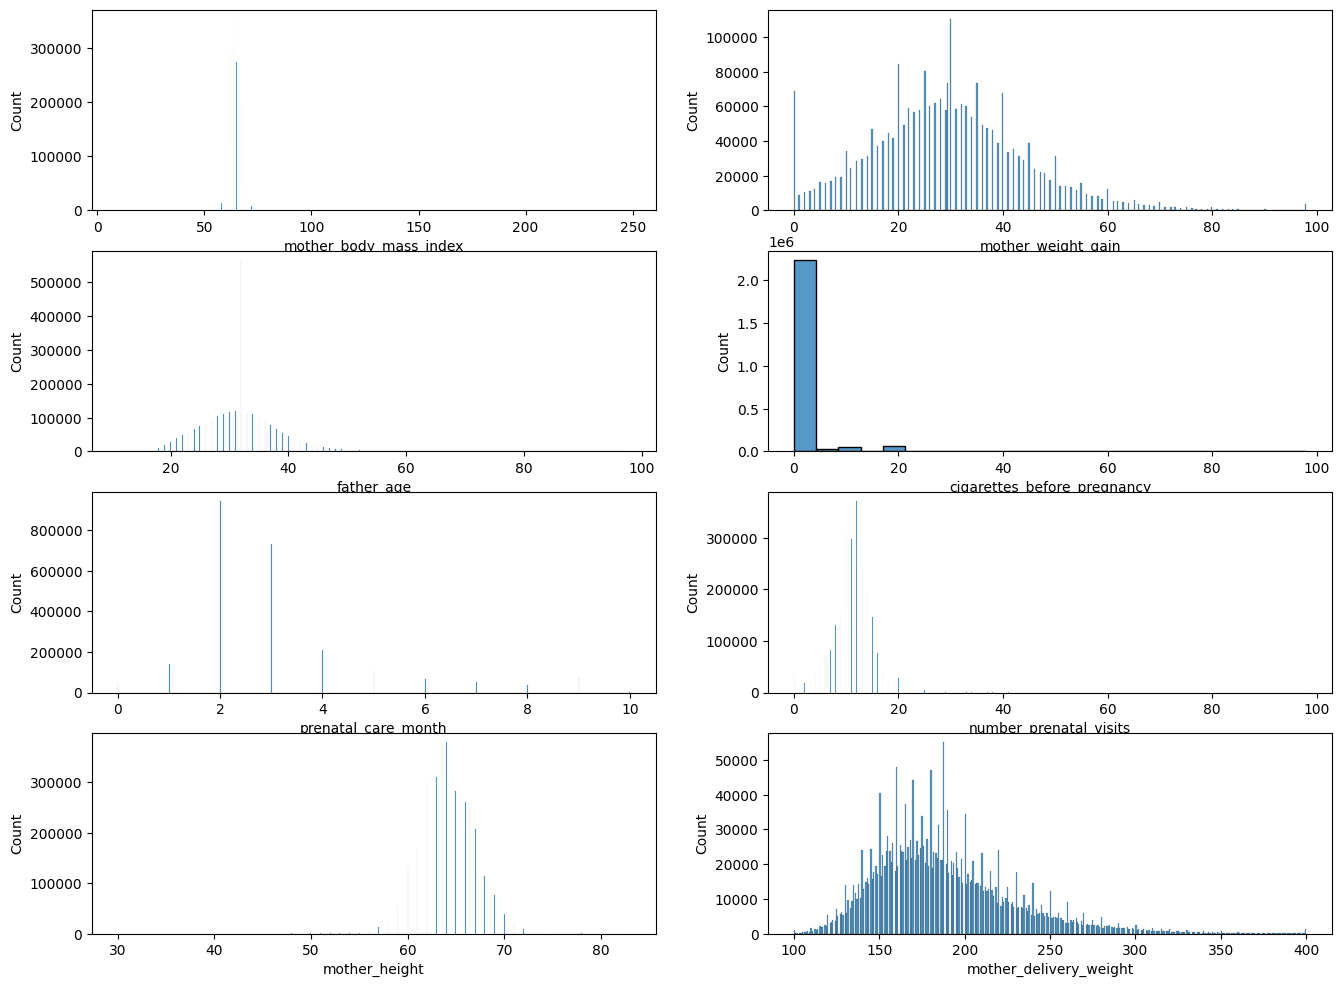

In [ ]:
fig, axes = plt.subplots(4, 2, figsize=(16, 12))
for ax, v in zip(axes.flat, ['mother_body_mass_index', 'mother_weight_gain', 
                             'father_age', 'cigarettes_before_pregnancy', 'prenatal_care_month', 'number_prenatal_visits', 'mother_height', 'mother_delivery_weight']):
    sns.histplot(d_train[v], kde=False, ax=ax)
    ax.set(ylabel="Count");

According to the intuition, the alarming variables indeed do contain a significant amount of outliers, especially 'cigarettes_before_pregnancy'. The variables we split as dummy variables are also sometimes heavily unbalanced, as is apparent from their mean values.

### Correlation

<Axes: >

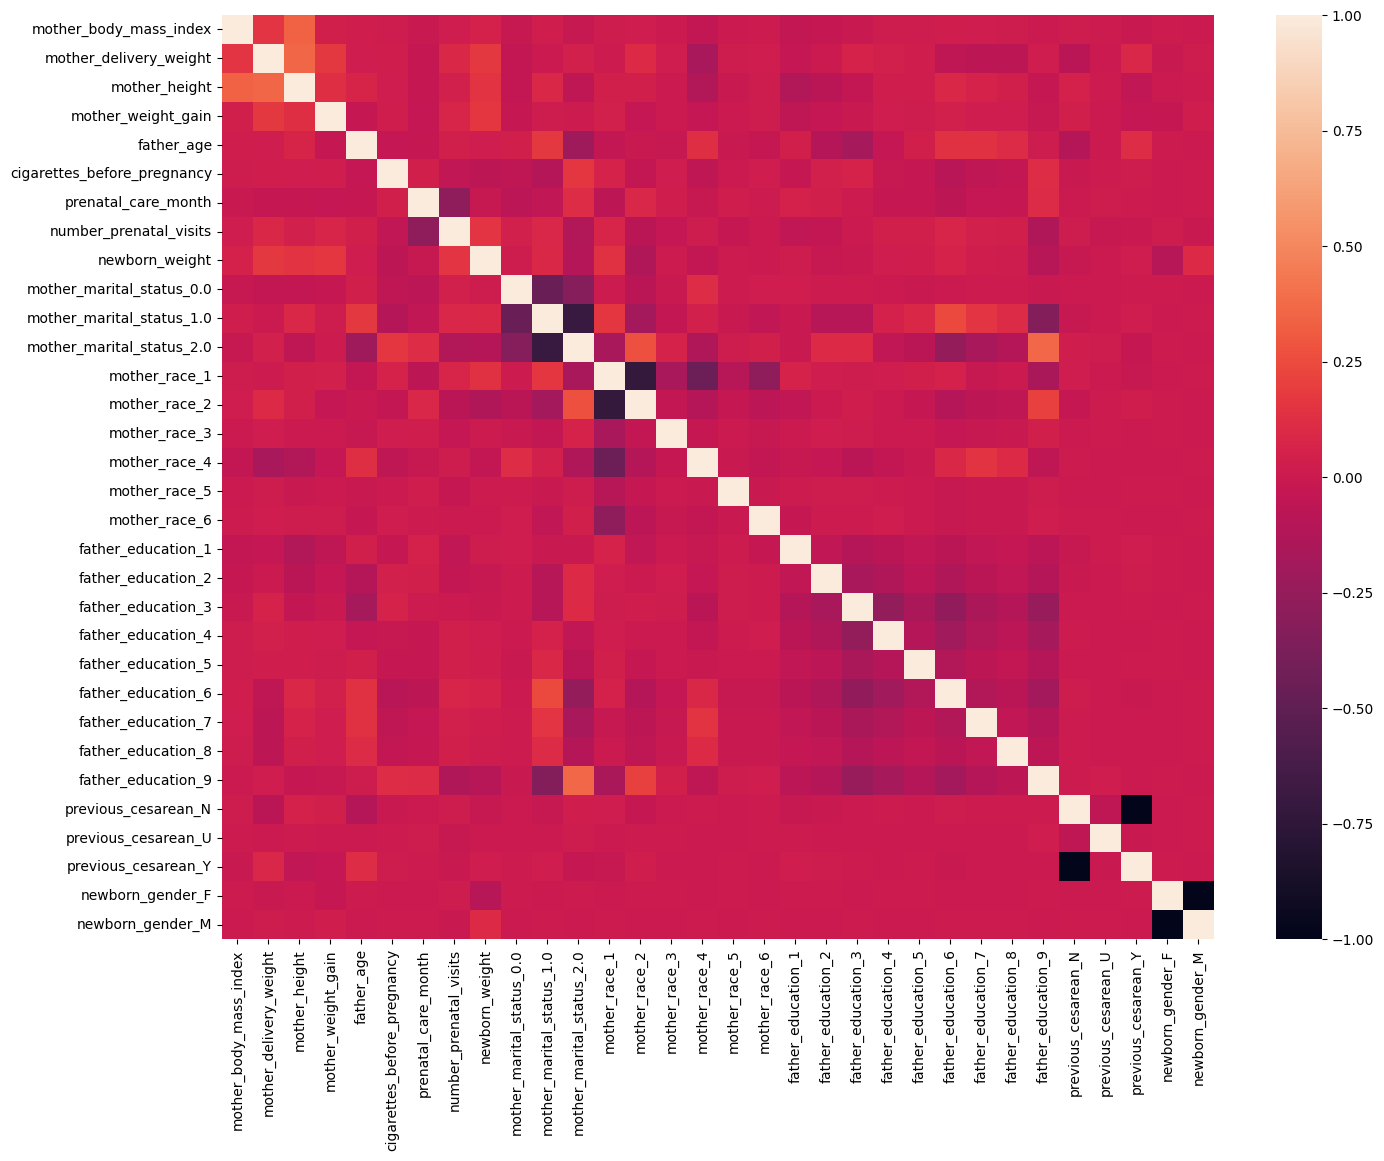

In [ ]:
fig, ax = plt.subplots(figsize=(16,12))
sns.heatmap(d_train.corr(), ax=ax, )

### Feature engineering

There are no highly correlated variables, among the ones that have not been one-hot encoded. We will implement a few interactions between most correlated variables to boost its importance and hopefully the models accuracy.

In [ ]:
#for i in ['mother_delivery_weight', 'other']: <-- polynomial for important variables
#    dataset[i + "_px"] = dataset[i] ** x
#    dataset[i + "_px"] = dataset[i] ** x

d_train['mother_height+deli_weight'] = d_train['mother_height'] * d_train['mother_delivery_weight']

d_train['mother_weight_gain+bmi'] = d_train['mother_weight_gain'] * d_train['mother_body_mass_index']

d_train['mother_deli_weight+bmi'] = d_train['mother_delivery_weight'] * d_train['mother_body_mass_index']

d_test['mother_height+deli_weight'] = d_test['mother_height'] * d_test['mother_delivery_weight']

d_test['mother_weight_gain+bmi'] = d_test['mother_weight_gain'] * d_test['mother_body_mass_index']

d_test['mother_deli_weight+bmi'] = d_test['mother_delivery_weight'] * d_test['mother_body_mass_index']

In [ ]:
d_train.describe().transpose().drop('count', axis=1)

,mean,std,min,25%,50%,75%,max
mother_body_mass_index,62.62,7.93,9.45,62.00,64.00,66.00,248.72
mother_delivery_weight,188.31,41.07,100.00,160.00,182.00,210.00,400.00
mother_height,64.12,2.82,30.00,62.00,64.00,66.00,83.00
mother_weight_gain,29.48,14.91,0.00,20.00,29.48,38.00,98.00
father_age,31.84,6.15,11.00,28.00,32.00,35.00,98.00
cigarettes_before_pregnancy,1.10,4.72,0.00,0.00,0.00,0.00,98.00
prenatal_care_month,3.05,1.78,0.00,2.00,3.00,3.00,10.00
number_prenatal_visits,11.29,4.14,0.00,9.00,11.00,13.00,98.00
newborn_weight,3261.84,590.47,227.00,2960.00,3300.00,3629.00,8165.00
mother_marital_status_0.0,0.17,0.38,0.00,0.00,0.00,0.00,1.00


# Modelling


TUTAJ NARAZIE KOD DO PRZYGOTOWANIA TYCH MODELI, MUSIMY ZDECYDOWAC JAK PODZIELIC NA TEST - TRAIN, ALBO DOPYTAC JAK LUDZIE ROBILI, ZEBY BYLO UNIFORM

In [ ]:
y_train = d_train['newborn_weight']
x_train = d_train.drop('newborn_weight', axis=1)

x_test = d_test

In [ ]:
#from imblearn.over_sampling import SMOTE

In [ ]:
#smote = SMOTE()

In [ ]:
#x_smote, y_smote = smote.fit_resample(x_train, y_train)

In [ ]:
sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

## Decision tree

In [ ]:
#model = DecisionTreeRegressor(max_depth=14, min_samples_split=5, max_features=20)

In [ ]:
#parameter_space = {
#    "max_depth": [7, 15],
#    "min_samples_split": [5, 10],
#    "max_features": [30, 45]
#}

#clf = GridSearchCV(DecisionTreeRegressor(), parameter_space, cv=4, 
#                   scoring="neg_mean_absolute_error")

#clf.fit(x_train, y_train)


In [ ]:
#clf = RandomizedSearchCV(DecisionTreeRegressor(), parameter_space, cv=4, 
#                         scoring="neg_mean_absolute_error", n_iter=100)

#clf.fit(x_train, y_train)

## Models

To decide which (min 3)

### Linear regression # test

In [ ]:
from sklearn.model_selection import train_test_split

x = d_train.drop('newborn_weight', axis=1)
y = d_train['newborn_weight']

x_train_x, x_val, y_train_y, y_val = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model_LR = LinearRegression()

model_LR.fit(x_train_x, y_train_y)

y_pred = model_LR.predict(x_val)

mse = mean_squared_error(y_val, y_pred)

print('Mean squared error (MSE): ', mse)

Mean squared error (MSE):  311441.17908954987


In [ ]:
def mape_calc(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred)/y_true))*100

mape = mape_calc (y_val, y_pred)

print('MAPE: ', mape)

MAPE:  16.20075777383479


### Ridge

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

In [ ]:
Ridge(alpha=1.0, fit_intercept=True, normalize=False, copy_X=True, 
      max_iter=None, tol=0.001, solver='auto', random_state=None)

In [ ]:
#parameter_space = {
#    "alpha": [1, 10, 100, 290, 500],
#    "fit_intercept": [True, False],
#    "solver": ['svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'],
#}

#clf = GridSearchCV(Ridge(random_state=3), parameter_space, n_jobs=4,
#                   cv=3, scoring="neg_mean_absolute_error")

#clf.fit(X_train, y_train)
#print("Best parameters:")
#print(clf.best_params_)

In [ ]:
#ridge_model = Ridge(random_state=3, **clf.best_params_)
ridge_model = Ridge(random_state=3)

In [ ]:
ridge_model.fit(x_train_x, y_train_y)

In [ ]:
y_pred_ridge = ridge_model.predict(x_train_x)
ridge_mae = mean_absolute_error(y_train_y, y_pred_ridge)
print("Ridge MAE =", ridge_mae)

### Elastic Net

In [ ]:
from sklearn.linear_model import ElasticNet

In [ ]:
ElasticNet(alpha=1.0, l1_ratio=0.5, fit_intercept=True, normalize=False, 
           precompute=False, max_iter=1000, copy_X=True, tol=0.0001, 
           warm_start=False, positive=False, random_state=None, selection='cyclic')

In [ ]:
#parameter_space = {
#    "alpha": [1, 10, 100, 280, 500],
#    "l1_ratio": [0.5, 1],
#    "fit_intercept": [True, False],
#}

#clf = GridSearchCV(ElasticNet(random_state=3), parameter_space, 
#                   n_jobs=4, cv=3, scoring="neg_mean_absolute_error")

#clf.fit(X_train, y_train)
#print("Best parameters:")
#print(clf.best_params_)

In [ ]:
#elasticNet_model = ElasticNet(random_state=3, **clf.best_params_)
elasticNet_model = ElasticNet(random_state=3)

In [ ]:
elasticNet_model.fit(x_train_x, y_train_y)

In [ ]:
y_pred_ela = elasticNet_model.predict(x_train_x)
elasticNet_mae = mean_absolute_error(y_train_y, y_pred_ela)
print("Elastic Net MAE =", elasticNet_mae)

### SVR

In [ ]:
from sklearn.svm import SVR

In [ ]:
SVR(kernel='rbf', degree=3, gamma='auto_deprecated', coef0=0.0, tol=0.001, 
    C=1.0, epsilon=0.1, shrinking=True, cache_size=200, verbose=False, max_iter=-1)

SVR(gamma='auto_deprecated')

In [ ]:
#parameter_space = \
#    {
#        "kernel": ["poly", "linear", "rbf", "sigmoid"],
#        "degree": [3, 5],
#        "coef0": [0, 3, 7],
#        "gamma":[1e-3, 1e-1, 1/x_train.shape[1]],
#        "C": [1, 10, 100],
#    }

#clf = RandomizedSearchCV(SVR(), parameter_space, cv=3, n_jobs=4,
#                   scoring="neg_mean_absolute_error")

#clf.fit(x_train, y_train)
#print("Best parameters:")
#print(clf.best_params_)

In [ ]:
#svr_model = SVR(**clf.best_params_)
svr_model = SVR()

In [ ]:
svr_model.fit(x_train_x, y_train_y)

In [ ]:
y_pred_svr = svr_model.predict(x_train_x)
svr_mae = mean_absolute_error(y_train_y, y_pred_svr)
print("Support Vector Regression MAE =", svr_mae)

### KNN

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
KNeighborsRegressor(n_neighbors=5, weights='uniform', algorithm='auto', 
                    leaf_size=30, p=2, metric='minkowski', metric_params=None, 
                    n_jobs=None)

In [ ]:
#parameter_space = {
#    "n_neighbors": [9, 10, 11,50],
#    "weights": ["uniform", "distance"],
#    "algorithm": ["ball_tree", "kd_tree", "brute"],
#    "leaf_size": [1,2,20,50,200]
#}

#clf = GridSearchCV(KNeighborsRegressor(), parameter_space, cv=3, 
#                   scoring="neg_mean_absolute_error", n_jobs=4)

#clf.fit(X_train, y_train)
#print("Best parameters:")
#print(clf.best_params_)

In [ ]:
#knn_model = KNeighborsRegressor(**clf.best_params_)
knn_model = KNeighborsRegressor()

In [ ]:
knn_model.fit(x_train_x, y_train_y)

In [ ]:
y_pred_knn = knn_model.predict(x_train_x)
knn_mae = mean_absolute_error(y_train_y, y_pred_knn)
print("K-Nearest Neighbors MAE =", knn_mae)

### Decision tree

In [94]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
DecisionTreeRegressor(criterion='mse', splitter='best', max_depth=None, 
                      min_samples_split=2, min_samples_leaf=1, 
                      min_weight_fraction_leaf=0.0, max_features=None, 
                      random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, 
                      min_impurity_split=None, presort=False)

In [ ]:
#parameter_space = \
#    {
#        "criterion": ["mse", "friedman_mse", "mae"],
#        "min_samples_split": [5, 18, 29, 50],
#        "min_samples_leaf": [3, 7, 15, 25],
#        "max_features": [20, 50, 150, 200, X_train.shape[1]],
#    }

#clf = GridSearchCV(DecisionTreeRegressor(random_state=3), parameter_space, 
#                   cv=3, scoring="neg_mean_absolute_error", n_jobs=4)

#clf.fit(X_train, y_train)
#print("Best parameters:")
#print(clf.best_params_)

In [ ]:
#dt_model = DecisionTreeRegressor(**clf.best_params_)
dt_model = DecisionTreeRegressor()

In [ ]:
dt_model.fit(x_train_x, y_train_y)

In [ ]:
y_pred_dt = dt_model.predict(x_train_x)
dt_mae = mean_absolute_error(y_train_y, y_pred_dt)
print("Decision Tree MAE =", dt_mae)

### Neutral Network

In [95]:
from sklearn.neural_network import MLPRegressor

In [ ]:
MLPRegressor(hidden_layer_sizes=(100, ), activation='relu', solver='adam', 
             alpha=0.0001, batch_size='auto', learning_rate='constant', 
             learning_rate_init=0.001, power_t=0.5, max_iter=200, shuffle=True, 
             random_state=None, tol=0.0001, verbose=False, warm_start=False, 
             momentum=0.9, nesterovs_momentum=True, early_stopping=False, 
             validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08, 
             n_iter_no_change=10)

In [ ]:
#parameter_space = \
#    {
#        "hidden_layer_sizes": [(7,)*3, (19,), (100,), (154,)],
#        "activation": ["identity", "logistic", "tanh", "relu"],
#        "solver": ["lbfgs"],
#        "alpha": [1, 10, 100],
#    }

#clf = GridSearchCV(MLPRegressor(random_state=3), parameter_space, 
#                   cv=3, scoring="neg_mean_absolute_error", n_jobs=4)

#clf.fit(X_train, y_train)
#print("Best parameters:")
#print(clf.best_params_)

In [ ]:
#nn_model = MLPRegressor(**clf.best_params_)
nn_model = MLPRegressor()

In [ ]:
nn_model.fit(x_train_x, y_train_y)

In [ ]:
y_pred_nn = nn_model.predict(x_train_x)
nn_mae = mean_absolute_error(y_train_y, y_pred_nn)
print("Neural Network MAE =", nn_mae)

### Random Forest

In [96]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
RandomForestRegressor(n_estimators='warn', criterion='mse', max_depth=None, 
                      min_samples_split=2, min_samples_leaf=1, 
                      min_weight_fraction_leaf=0.0, max_features='auto', 
                      max_leaf_nodes=None, min_impurity_decrease=0.0, 
                      min_impurity_split=None, bootstrap=True, oob_score=False, 
                      n_jobs=None, random_state=None, verbose=0, warm_start=False)

In [ ]:
#parameter_space = \
#    {
#        "n_estimators": [10, 100, 300, 600],
#        "criterion": ["mse", "mae"],
#        "max_depth": [7, 50, 254],
#        "min_samples_split": [2, 5],
#        "min_samples_leaf": [1, 5],
#        "max_features": [19, 100, X_train.shape[1]],
#        "bootstrap": [True, False],
#    }

#clf = RandomizedSearchCV(RandomForestRegressor(random_state=3), 
#                         parameter_space, cv=3, n_jobs=4,
#                         scoring="neg_mean_absolute_error", 
#                         n_iter=10, random_state=3)

#clf.fit(X_train, y_train)
#print("Best parameters:")
#print(clf.best_params_)

In [ ]:
#rf_model = RandomForestRegressor(**clf.best_params_)
rf_model = RandomForestRegressor()

In [ ]:
rf_model.fit(x_train_x, y_train_y)

In [ ]:
y_pred_rf = rf_model.predict(x_train_x)
rf_mae = mean_absolute_error(y_train_y, y_pred_rf)
print("Random Forest MAE =", rf_mae)

### Gradient Boosting

In [97]:
from xgboost import XGBRegressor

In [ ]:
XGBRegressor(max_depth=3, learning_rate=0.1, n_estimators=100, silent=True, 
             objective='reg:linear', booster='gbtree', n_jobs=1, nthread=None, 
             gamma=0, min_child_weight=1, max_delta_step=0, subsample=1, 
             colsample_bytree=1, colsample_bylevel=1, reg_alpha=0, reg_lambda=1, 
             scale_pos_weight=1, base_score=0.5, random_state=0, seed=None, 
             missing=None, importance_type='gain')

In [ ]:
#parameter_space = \
#    {
#        "max_depth": [4, 5, 6],
#        "learning_rate": [0.005, 0.009, 0.01],
#        "n_estimators": [700, 1000, 2500],
#        "booster": ["gbtree",],
#        "gamma": [7, 25, 100],
#        "subsample": [0.3, 0.6],
#        "colsample_bytree": [0.5, 0.7],
#        "colsample_bylevel": [0.5, 0.7,],
#        "reg_alpha": [1, 10, 33],
#        "reg_lambda": [1, 3, 10],
#    }

#clf = RandomizedSearchCV(XGBRegressor(random_state=3), 
#                         parameter_space, cv=3, n_jobs=4,
#                         scoring="neg_mean_absolute_error", 
#                         random_state=3, n_iter=10)

#clf.fit(X_train, y_train)
#print("Best parameters:")
#print(clf.best_params_)

In [ ]:
#xgb_model = XGBRegressor(**clf.best_params_)
xgb_model = XGBRegressor()

In [ ]:
xgb_model.fit(x_train_x, y_train_y)

In [ ]:
y_pred_gb = xgb_model.predict(x_train_x)
xgb_mae = mean_absolute_error(y_train_y, y_pred_gb)
print("XGBoost MAE =", xgb_mae)